<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [4]:
!pip install seaborn

import seaborn as sns

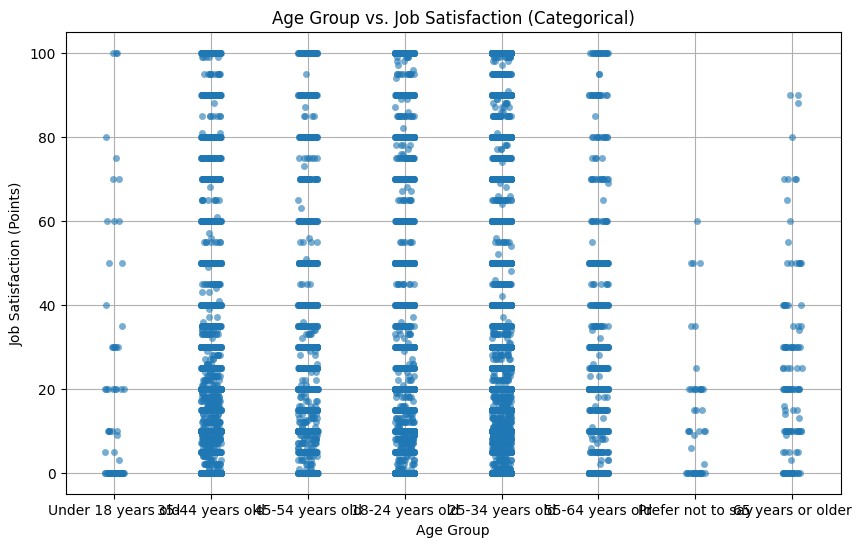

In [5]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Age', y='JobSatPoints_6', jitter=True, alpha=0.6)

plt.title('Age Group vs. Job Satisfaction (Categorical)')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


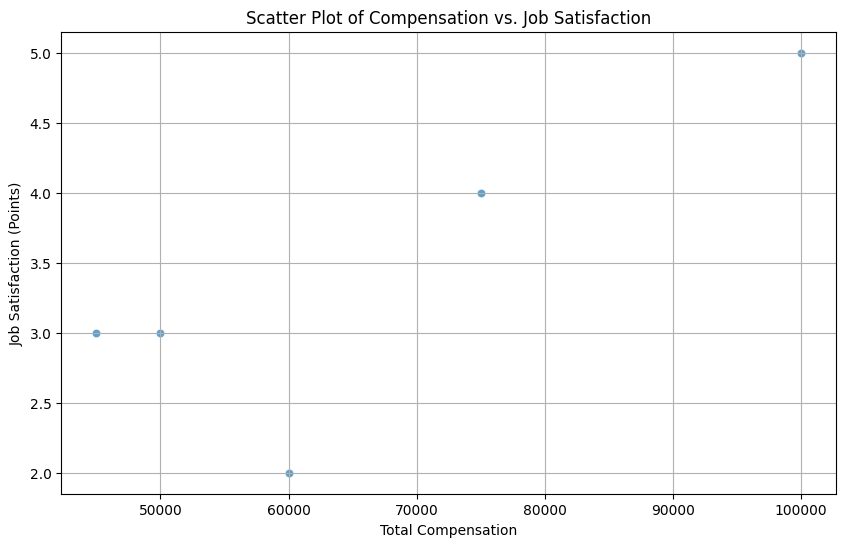

In [6]:
## Write your code here
data = {
    'CompTotal': [50000, 75000, 60000, 100000, 45000],
    'JobSatPoints_6': [3, 4, 2, 5, 3]
}
df = pd.DataFrame(data)

# Step 2: Drop rows with missing values (if any)
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Step 3: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CompTotal', y='JobSatPoints_6', alpha=0.7)

plt.title('Scatter Plot of Compensation vs. Job Satisfaction')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


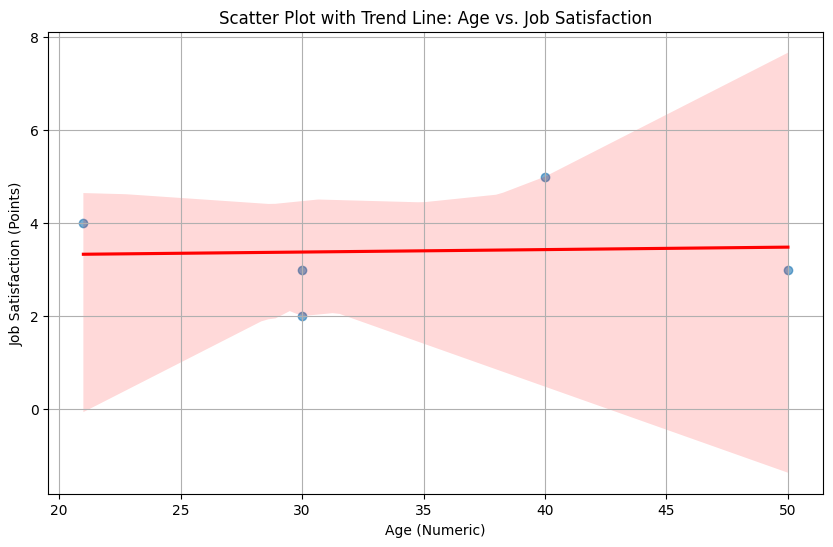

In [7]:
## Write your code here
# Example data (replace with your actual DataFrame)
data = {
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', '25-34 years old', '45-54 years old'],
    'JobSatPoints_6': [4, 3, 5, 2, 3]
}
df = pd.DataFrame(data)

# Convert Age groups to numeric (for trend line)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop missing values if any
df = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Plot Scatter + Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='AgeNumeric', y='JobSatPoints_6', scatter_kws={'alpha':0.6}, line_kws={"color":"red"})

plt.title('Scatter Plot with Trend Line: Age vs. Job Satisfaction')
plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


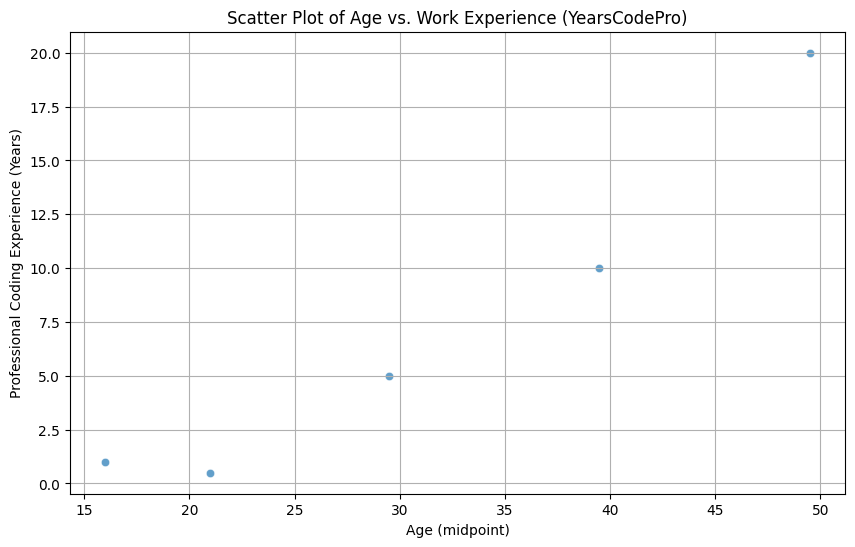

In [9]:
## Write your code here
# Example: Replace with your actual DataFrame
import re  

df = pd.DataFrame({
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 'Under 18 years old'],
    'YearsCodePro': ['< 1 year', '5', '10', '20', '1']
})

# Step 1: Convert Age group to numeric (midpoints)
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    if 'Under' in age_str:
        return 16
    if '65' in age_str and 'older' in age_str:
        return 70
    match = re.search(r'(\d+)\s*-\s*(\d+)', age_str)
    if match:
        lo, hi = map(int, match.groups())
        return (lo + hi) / 2
    match = re.search(r'(\d+)', age_str)
    if match:
        return float(match.group(1))
    return None

df['AgeNumeric'] = df['Age'].apply(age_to_midpoint)

# Step 2: Convert YearsCodePro to numeric
def convert_experience(val):
    if pd.isna(val):
        return None
    if '<' in val:
        return 0.5
    try:
        return float(val)
    except:
        return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_experience)

# Step 3: Drop missing values
df_clean = df.dropna(subset=['AgeNumeric', 'YearsCodeProNumeric'])

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNumeric', y='YearsCodeProNumeric', alpha=0.7)

plt.title('Scatter Plot of Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age (midpoint)')
plt.ylabel('Professional Coding Experience (Years)')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


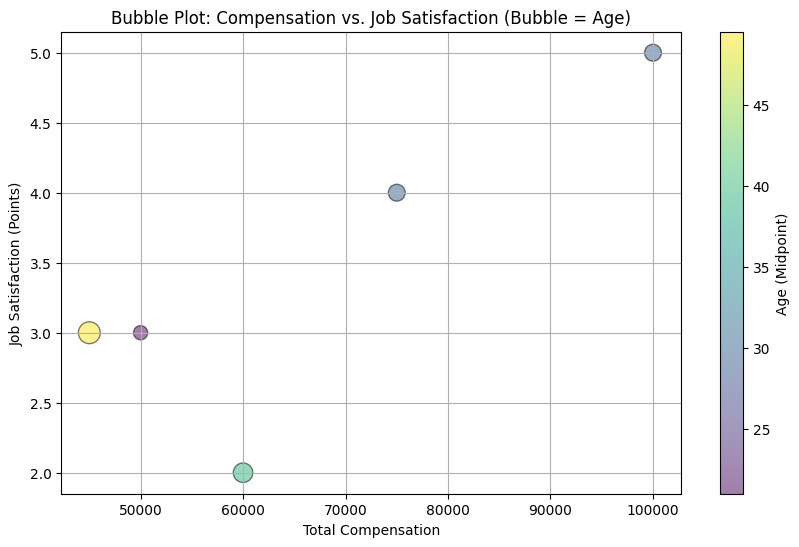

In [10]:
## Write your code here
# Example data (replace this with your real DataFrame)
df = pd.DataFrame({
    'CompTotal': [50000, 75000, 60000, 100000, 45000],
    'JobSatPoints_6': [3, 4, 2, 5, 3],
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', '25-34 years old', '45-54 years old']
})

# Step 1: Convert Age group to numeric midpoints for bubble sizing
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    if 'Under' in age_str:
        return 16
    if '65' in age_str and 'older' in age_str:
        return 70
    match = re.search(r'(\d+)\s*-\s*(\d+)', age_str)
    if match:
        lo, hi = map(int, match.groups())
        return (lo + hi) / 2
    match = re.search(r'(\d+)', age_str)
    if match:
        return float(match.group(1))
    return None

df['AgeNumeric'] = df['Age'].apply(age_to_midpoint)

# Step 2: Drop rows with missing values
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6', 'AgeNumeric'])

# Step 3: Normalize age to a reasonable bubble size range
df['BubbleSize'] = df['AgeNumeric'] * 5  # Scale factor for visualization

# Step 4: Create Bubble Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df['CompTotal'],
    y=df['JobSatPoints_6'],
    s=df['BubbleSize'],  # Bubble size
    alpha=0.5,
    c=df['AgeNumeric'],  # Optional: color by age
    cmap='viridis',
    edgecolors='black'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble = Age)')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (Points)')
cbar = plt.colorbar(scatter)
cbar.set_label('Age (Midpoint)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


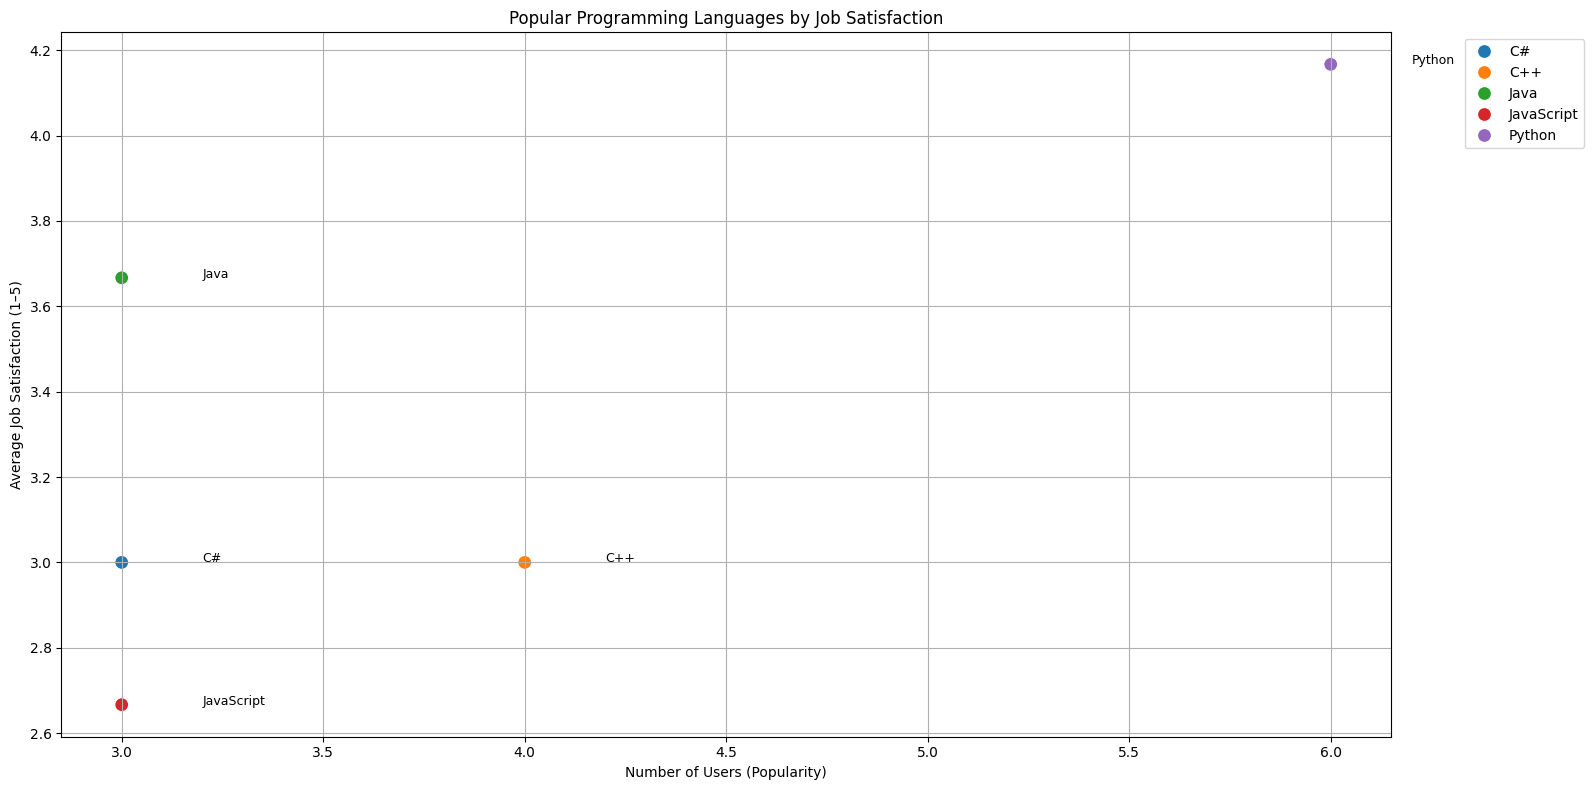

In [11]:
## Write your code here
df = pd.DataFrame({
    'LanguageHaveWorkedWith': [
        'Python;JavaScript', 'C++;Python', 'Python;Java', 'JavaScript;C#', 'Java;C++',
        'C#;Python', 'JavaScript;C++', 'Python', 'C#;Java', 'Python;C++'
    ],
    'JobSatPoints_6': [4, 3, 5, 2, 3, 4, 2, 5, 3, 4]
})

# Step 1: Expand the Language column (split multiple entries into rows)
df_expanded = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()
df_expanded['LanguageHaveWorkedWith'] = df_expanded['LanguageHaveWorkedWith'].str.split(';')
df_expanded = df_expanded.explode('LanguageHaveWorkedWith')
df_expanded.rename(columns={'LanguageHaveWorkedWith': 'Language'}, inplace=True)

# Step 2: Group by language and calculate:
# - Popularity (count)
# - Average job satisfaction
language_stats = df_expanded.groupby('Language').agg(
    Popularity=('Language', 'count'),
    AvgJobSatisfaction=('JobSatPoints_6', 'mean')
).reset_index()

# Step 3: Scatter Plot
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=language_stats,
    x='Popularity',
    y='AvgJobSatisfaction',
    hue='Language',
    s=100
)

# Annotate points
for _, row in language_stats.iterrows():
    plt.text(row['Popularity'] + 0.2, row['AvgJobSatisfaction'], row['Language'], fontsize=9)

plt.title('Popular Programming Languages by Job Satisfaction')
plt.xlabel('Number of Users (Popularity)')
plt.ylabel('Average Job Satisfaction (1–5)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


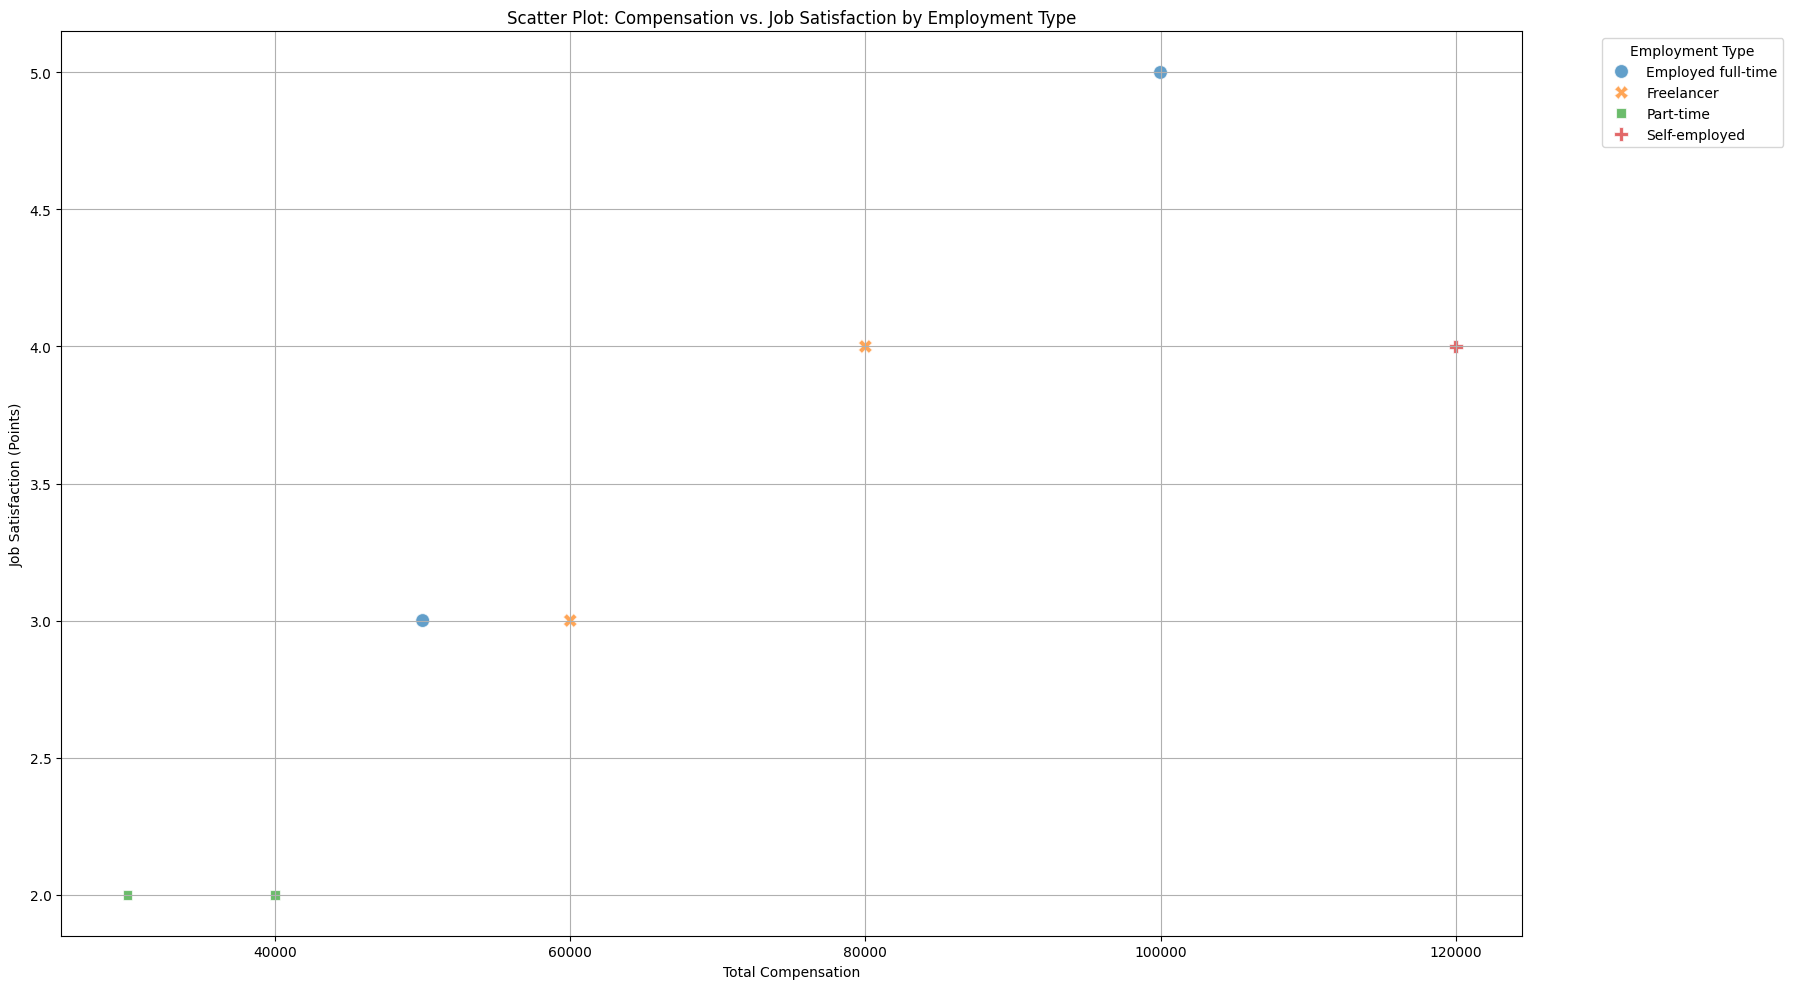

In [12]:
## Write your code here
# Example data (replace this with your actual DataFrame)
df = pd.DataFrame({
    'CompTotal': [50000, 80000, 30000, 100000, 60000, 40000, 120000],
    'JobSatPoints_6': [3, 4, 2, 5, 3, 2, 4],
    'Employment': [
        'Employed full-time', 'Freelancer', 'Part-time', 
        'Employed full-time', 'Freelancer', 'Part-time', 'Self-employed'
    ]
})

# Step 1: Drop rows with missing values
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6', 'Employment'])

# Step 2: Plot
plt.figure(figsize=(18, 10))
sns.scatterplot(
    data=df,
    x='CompTotal',
    y='JobSatPoints_6',
    hue='Employment',
    style='Employment',
    palette='tab10',
    alpha=0.7,
    s=100
)

plt.title('Scatter Plot: Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


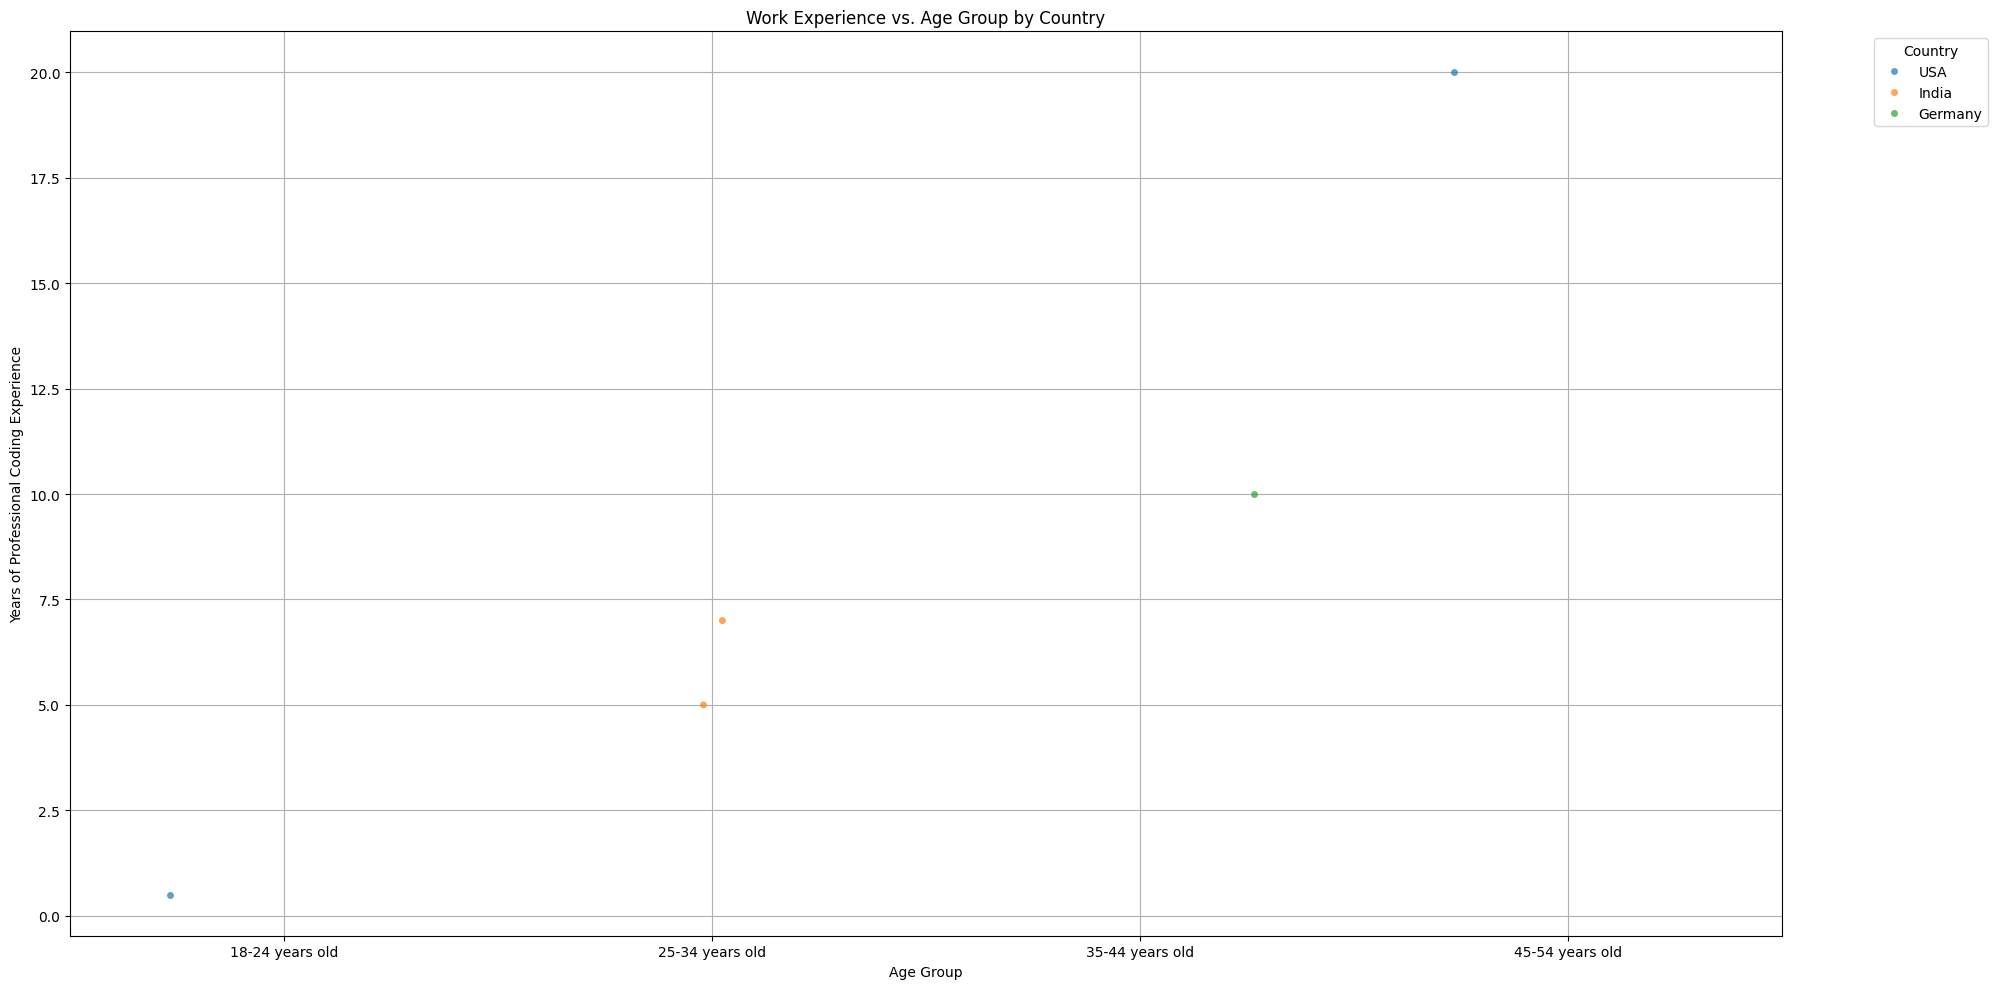

In [14]:
## Write your code here
# Example data (replace with your actual DataFrame)
df = pd.DataFrame({
    'Age': ['18-24 years old', '25-34 years old', '35-44 years old', '25-34 years old', '45-54 years old'],
    'YearsCodePro': ['< 1 year', '5', '10', '7', '20'],
    'Country': ['USA', 'India', 'Germany', 'India', 'USA']
})

# Step 1: Convert 'YearsCodePro' to numeric
def convert_experience(val):
    if pd.isna(val):
        return None
    if '<' in val:
        return 0.5
    try:
        return float(val)
    except:
        return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_experience)

# Step 2: Drop rows with missing values
df_clean = df.dropna(subset=['Age', 'YearsCodeProNumeric', 'Country'])

# Step 3: Scatter plot
plt.figure(figsize=(20, 10))
sns.stripplot(
    data=df_clean,
    x='Age',
    y='YearsCodeProNumeric',
    hue='Country',
    dodge=True,
    jitter=True,
    alpha=0.7
)

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
